# Course Work — Machine Learning

### Dataset Information  
**Dataset:** Telco Customer Churn (blastchar, Kaggle)  
**URL:** https://www.kaggle.com/datasets/blastchar/telco-customer-churn  
**Downloaded:** 2024-XX-XX  
**Description:** Customer account, service usage, and churn status used for predictive modelling.


In [ ]:
# === Task 1: install (Colab only) and imports ===


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')  # follow auth steps
FILE = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'

sns.set_style("whitegrid")   # safe seaborn style
%matplotlib inline

OUTDIR = "figures_task1"
os.makedirs(OUTDIR, exist_ok=True)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ONE-CELL RECOVERY: mounts Drive, loads dataset, cleans, saves meta to Drive/results


import os, shutil, pprint, pandas as pd, numpy as np

# 1) Mount Drive if not already mounted (colab only)
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=False)
    drive_root = '/content/drive/MyDrive'
    print("Drive mounted at", drive_root)
except Exception as e:
    # not in Colab or drive mount not needed
    drive_root = None
    print("Drive mount skipped or not available:", e)

# 2) Try to find the CSV automatically in common locations
candidates = [
    "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv",
    os.path.join(drive_root, "Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv") if drive_root else None,
    os.path.join(drive_root, "WA_Fn-UseC_-Telco-Customer-Churn.csv") if drive_root else None,
    os.path.join(drive_root, "Course_Work", "WA_Fn-UseC_-Telco-Customer-Churn.csv") if drive_root else None
]
# extend with any CSVs that match "telco" or "churn"
if drive_root:
    for root, dirs, files in os.walk(drive_root):
        for f in files:
            if f.lower().endswith('.csv') and ('telco' in f.lower() or 'churn' in f.lower() or 'wa_fn' in f.lower()):
                candidates.append(os.path.join(root, f))

# Deduplicate and filter existing
candidates = [c for c in dict.fromkeys(candidates) if c]
found = [c for c in candidates if os.path.exists(c)]

print("CSV candidates searched (first 20):")
pprint.pprint(candidates[:20])
print("\nFound CSVs:")
pprint.pprint(found[:10])

if not found:
    raise FileNotFoundError("No telco CSV found automatically. Upload the CSV to Drive or /content and re-run. Use Colab Files pane to upload or place it in 'Colab Notebooks' in Drive.")

# use the first found
csv_path = found[0]
print("Using CSV:", csv_path)

# 3) Set OUTDIR to a persistent folder in Drive if possible, else /content/results
if drive_root:
    OUTDIR = os.path.join(drive_root, "ML_Coursework_results")
else:
    OUTDIR = "/content/results"
os.makedirs(OUTDIR, exist_ok=True)
print("OUTDIR set to:", OUTDIR)

# 4) If csv is in Drive, copy to /content for faster IO (optional)
local_csv = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
if csv_path != local_csv:
    try:
        shutil.copy(csv_path, local_csv)
        print("Copied CSV to", local_csv)
        csv_path = local_csv
    except Exception as e:
        print("Could not copy to /content, will use Drive path directly. Error:", e)

# 5) Load dataset into df
df = pd.read_csv(csv_path)
print("Loaded df shape:", df.shape)

# 6) Basic cleaning (TotalCharges numeric)
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
    print("Cleaned TotalCharges; nulls after fill:", int(df['TotalCharges'].isnull().sum()))
else:
    print("Warning: 'TotalCharges' not found in columns:", list(df.columns)[:20])

# 7) Build and save dataset meta (attributes, dtype, missing %)
meta_df = pd.DataFrame({
    'attribute': df.columns,
    'dtype': [str(df[c].dtype) for c in df.columns],
    'missing_count': [int(df[c].isnull().sum()) for c in df.columns],
    'missing_pct': [float(df[c].isnull().mean() * 100) for c in df.columns]
})

meta_df_path = os.path.join(OUTDIR, 'dataset_meta_attributes.csv')
meta_df.to_csv(meta_df_path, index=False)
print("Saved dataset meta ->", meta_df_path)

# 8) Summary and quick checks
print("\nPreview of meta_df:")
display(meta_df.head(40))

print("\nSaved files in OUTDIR (first 50):")
pprint.pprint(sorted(os.listdir(OUTDIR))[:50])

# 9) Keep df in memory for subsequent cells
print("\nDataframe 'df' is loaded and ready to use.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive mounted at /content/drive/MyDrive
CSV candidates searched (first 20):
['/content/WA_Fn-UseC_-Telco-Customer-Churn.csv',
 '/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv',
 '/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv',
 '/content/drive/MyDrive/Course_Work/WA_Fn-UseC_-Telco-Customer-Churn.csv',
 '/content/drive/MyDrive/ML_Coursework_results/churn_counts.csv',
 '/content/drive/MyDrive/ML_Coursework_results/churn_numeric_stats_by_group.csv',
 '/content/drive/MyDrive/ML_Coursework_results/churn_props.csv',
 '/content/drive/MyDrive/ML_Coursework_results/cat_summary_Churn.csv',
 '/content/drive/MyDrive/ML_Coursework_results/PaymentMethod_churn_rates.csv',
 '/content/drive/MyDrive/ML_Coursework_results/StreamingTV_churn_rates.csv',
 '/content/drive/MyDrive/ML_Coursework_results/TechSupport_churn_rates.csv',
 '/conte

,attribute,dtype,missing_count,missing_pct
0,customerID,object,0,0.0
1,gender,object,0,0.0
2,SeniorCitizen,int64,0,0.0
3,Partner,object,0,0.0
4,Dependents,object,0,0.0
5,tenure,int64,0,0.0
6,PhoneService,object,0,0.0
7,MultipleLines,object,0,0.0
8,InternetService,object,0,0.0
9,OnlineSecurity,object,0,0.0



Saved files in OUTDIR (first 50):
['Contract_churn_rates.csv',
 'InternetService_churn_rates.csv',
 'OnlineSecurity_churn_rates.csv',
 'PaymentMethod_churn_rates.csv',
 'StreamingTV_churn_rates.csv',
 'TechSupport_churn_rates.csv',
 'cat_summary_Churn.csv',
 'cat_summary_Contract.csv',
 'cat_summary_Dependents.csv',
 'cat_summary_DeviceProtection.csv',
 'cat_summary_InternetService.csv',
 'cat_summary_MultipleLines.csv',
 'cat_summary_OnlineBackup.csv',
 'cat_summary_OnlineSecurity.csv',
 'cat_summary_PaperlessBilling.csv',
 'cat_summary_Partner.csv',
 'cat_summary_PaymentMethod.csv',
 'cat_summary_PhoneService.csv',
 'cat_summary_StreamingMovies.csv',
 'cat_summary_StreamingTV.csv',
 'cat_summary_TechSupport.csv',
 'cat_summary_gender.csv',
 'churn_counts.csv',
 'churn_counts.png',
 'churn_numeric_stats_by_group.csv',
 'churn_props.csv',
 'cleaned_sample_200.csv',
 'contract_vs_churn.png',
 'corr_heatmap.png',
 'dataset_meta.csv',
 'dataset_meta_attributes.csv',
 'dist_monthlycharges

In [ ]:
# === Task 1: load file (set FILE variable earlier) ===
# FILE = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(FILE)
print("Initial shape:", df.shape)
display(df.head(5))



Initial shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# === Task 1: Fix TotalCharges and report missing ===
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# If TotalCharges missing and tenure == 0, set to 0
df.loc[df['TotalCharges'].isnull() & (df['tenure'] == 0), 'TotalCharges'] = 0.0
before = df.shape[0]
df = df.dropna().reset_index(drop=True)
after = df.shape[0]
print(f"Dropped rows with remaining missing values: {before - after}")
print("New shape:", df.shape)

Dropped rows with remaining missing values: 0
New shape: (7043, 21)


In [ ]:
# === Task 1: Basic meta info (save table) ===
meta = pd.DataFrame({
    'n_rows': [before],
    'n_cols': [df.shape[1]],
    'dropped_missing_rows': [before - after]
})
meta.to_csv(os.path.join(OUTDIR, 'dataset_meta.csv'), index=False)
display(meta)


,n_rows,n_cols,dropped_missing_rows
0,7043,21,0


In [ ]:
# === Task 1: Class balance & numeric summary ===
churn_counts = df['Churn'].value_counts().rename_axis('Churn').reset_index(name='count')
churn_props  = df['Churn'].value_counts(normalize=True).rename_axis('Churn').reset_index(name='proportion')
churn_counts.to_csv(os.path.join(OUTDIR, 'churn_counts.csv'), index=False)
churn_props.to_csv(os.path.join(OUTDIR, 'churn_props.csv'), index=False)
display(churn_counts); display(churn_props)

num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_summary = df[num_cols].describe().T
num_summary.to_csv(os.path.join(OUTDIR, 'numeric_summary.csv'))
display(num_summary)

,Churn,count
0,No,5174
1,Yes,1869


,Churn,proportion
0,No,0.73463
1,Yes,0.26537


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [ ]:
# === Task 1: Numeric medians and means for churn groups ===
df_group = df.copy()
df_group['Churn_flag'] = df_group['Churn'].map({'No':0, 'Yes':1})

stats = df_group.groupby('Churn')[['tenure','MonthlyCharges','TotalCharges']].agg(['median','mean','count'])
stats.columns = ['_'.join(col).strip() for col in stats.columns.values]

stats_path = os.path.join(OUTDIR, 'churn_numeric_stats_by_group.csv')
stats.to_csv(stats_path)

print("Saved churn numeric stats ->", stats_path)
display(stats)


Saved churn numeric stats -> /content/drive/MyDrive/ML_Coursework_results/churn_numeric_stats_by_group.csv


,tenure_median,tenure_mean,tenure_count,MonthlyCharges_median,MonthlyCharges_mean,MonthlyCharges_count,TotalCharges_median,TotalCharges_mean,TotalCharges_count
Churn,,,,,,,,,
No,38.0,37.569965,5174,64.425,61.265124,5174,1679.525,2549.911442,5174
Yes,10.0,17.979133,1869,79.650,74.441332,1869,703.550,1531.796094,1869


In [ ]:
# === Task 1: Categorical summaries & churn rate per category ===
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'customerID' in cat_cols: cat_cols.remove('customerID')

for c in cat_cols:
    counts = df[c].value_counts().rename_axis(c).reset_index(name='count')
    churn_rate = df.groupby(c)['Churn'].apply(lambda s: (s=='Yes').mean()).rename('churn_rate').reset_index()
    summary = counts.merge(churn_rate, on=c)
    summary['churn_pct'] = summary['churn_rate'] * 100
    summary = summary.sort_values('count', ascending=False)
    fname = os.path.join(OUTDIR, f'cat_summary_{c}.csv')
    summary.to_csv(fname, index=False)
    print(f"Saved categorical summary: {fname}")
    display(summary.head(6))


Saved categorical summary: /content/drive/MyDrive/ML_Coursework_results/cat_summary_gender.csv


,gender,count,churn_rate,churn_pct
0,Male,3555,0.261603,26.160338
1,Female,3488,0.269209,26.920872


Saved categorical summary: /content/drive/MyDrive/ML_Coursework_results/cat_summary_Partner.csv


,Partner,count,churn_rate,churn_pct
0,No,3641,0.329580,32.957979
1,Yes,3402,0.196649,19.664903


Saved categorical summary: /content/drive/MyDrive/ML_Coursework_results/cat_summary_Dependents.csv


,Dependents,count,churn_rate,churn_pct
0,No,4933,0.312791,31.279140
1,Yes,2110,0.154502,15.450237


Saved categorical summary: /content/drive/MyDrive/ML_Coursework_results/cat_summary_PhoneService.csv


,PhoneService,count,churn_rate,churn_pct
0,Yes,6361,0.267096,26.709637
1,No,682,0.249267,24.926686


Saved categorical summary: /content/drive/MyDrive/ML_Coursework_results/cat_summary_MultipleLines.csv


,MultipleLines,count,churn_rate,churn_pct
0,No,3390,0.250442,25.044248
1,Yes,2971,0.286099,28.609896
2,No phone service,682,0.249267,24.926686


Saved categorical summary: /content/drive/MyDrive/ML_Coursework_results/cat_summary_InternetService.csv


,InternetService,count,churn_rate,churn_pct
0,Fiber optic,3096,0.418928,41.892765
1,DSL,2421,0.189591,18.959108
2,No,1526,0.074050,7.404980


Saved categorical summary: /content/drive/MyDrive/ML_Coursework_results/cat_summary_OnlineSecurity.csv


,OnlineSecurity,count,churn_rate,churn_pct
0,No,3498,0.417667,41.766724
1,Yes,2019,0.146112,14.611194
2,No internet service,1526,0.074050,7.404980


Saved categorical summary: /content/drive/MyDrive/ML_Coursework_results/cat_summary_OnlineBackup.csv


,OnlineBackup,count,churn_rate,churn_pct
0,No,3088,0.399288,39.928756
1,Yes,2429,0.215315,21.531494
2,No internet service,1526,0.074050,7.404980


Saved categorical summary: /content/drive/MyDrive/ML_Coursework_results/cat_summary_DeviceProtection.csv


,DeviceProtection,count,churn_rate,churn_pct
0,No,3095,0.391276,39.127625
1,Yes,2422,0.225021,22.502064
2,No internet service,1526,0.074050,7.404980


Saved categorical summary: /content/drive/MyDrive/ML_Coursework_results/cat_summary_TechSupport.csv


,TechSupport,count,churn_rate,churn_pct
0,No,3473,0.416355,41.635474
1,Yes,2044,0.151663,15.166341
2,No internet service,1526,0.074050,7.404980


Saved categorical summary: /content/drive/MyDrive/ML_Coursework_results/cat_summary_StreamingTV.csv


,StreamingTV,count,churn_rate,churn_pct
0,No,2810,0.335231,33.523132
1,Yes,2707,0.300702,30.070188
2,No internet service,1526,0.074050,7.404980


Saved categorical summary: /content/drive/MyDrive/ML_Coursework_results/cat_summary_StreamingMovies.csv


,StreamingMovies,count,churn_rate,churn_pct
0,No,2785,0.336804,33.680431
1,Yes,2732,0.299414,29.941435
2,No internet service,1526,0.074050,7.404980


Saved categorical summary: /content/drive/MyDrive/ML_Coursework_results/cat_summary_Contract.csv


,Contract,count,churn_rate,churn_pct
0,Month-to-month,3875,0.427097,42.709677
1,Two year,1695,0.028319,2.831858
2,One year,1473,0.112695,11.269518


Saved categorical summary: /content/drive/MyDrive/ML_Coursework_results/cat_summary_PaperlessBilling.csv


,PaperlessBilling,count,churn_rate,churn_pct
0,Yes,4171,0.335651,33.565092
1,No,2872,0.163301,16.330084


Saved categorical summary: /content/drive/MyDrive/ML_Coursework_results/cat_summary_PaymentMethod.csv


,PaymentMethod,count,churn_rate,churn_pct
0,Electronic check,2365,0.452854,45.285412
1,Mailed check,1612,0.191067,19.106700
2,Bank transfer (automatic),1544,0.167098,16.709845
3,Credit card (automatic),1522,0.152431,15.243101


Saved categorical summary: /content/drive/MyDrive/ML_Coursework_results/cat_summary_Churn.csv


,Churn,count,churn_rate,churn_pct
0,No,5174,0.0,0.0
1,Yes,1869,1.0,100.0


Saved: /content/drive/MyDrive/ML_Coursework_results/churn_counts.png


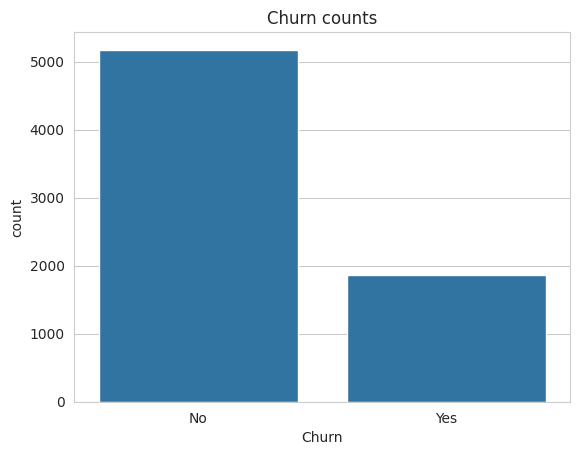

Saved: /content/drive/MyDrive/ML_Coursework_results/dist_tenure.png


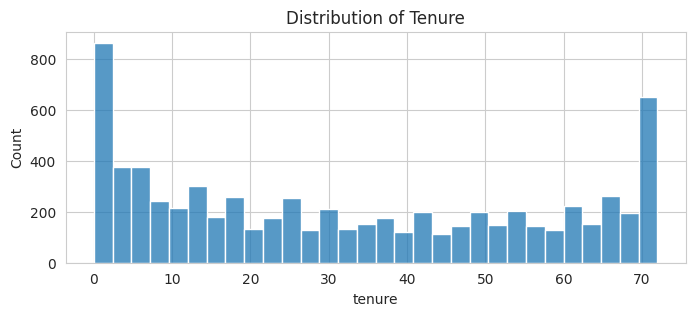

Saved: /content/drive/MyDrive/ML_Coursework_results/tenure_by_churn.png


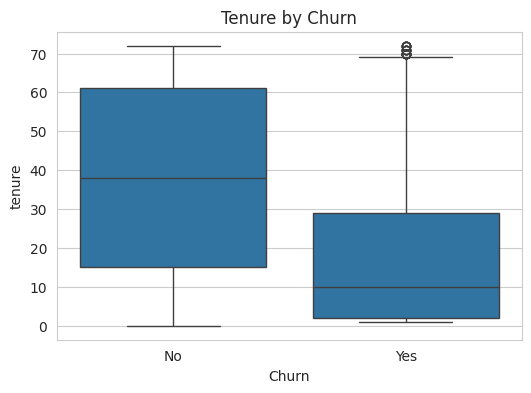

Saved: /content/drive/MyDrive/ML_Coursework_results/dist_monthlycharges.png


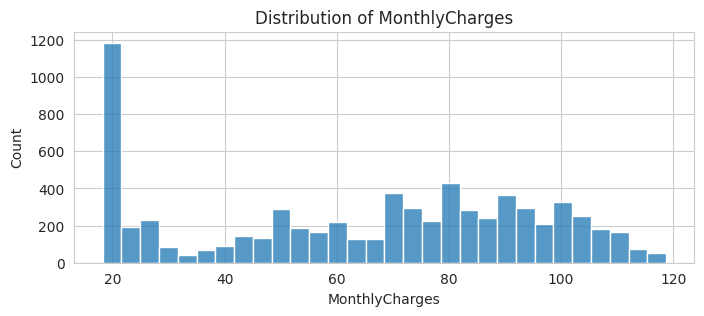

Saved: /content/drive/MyDrive/ML_Coursework_results/monthly_by_churn.png


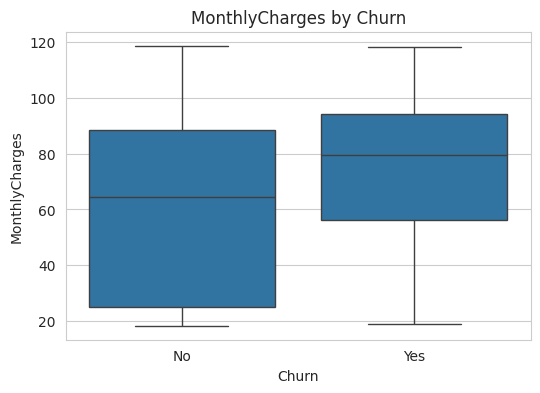

Saved: /content/drive/MyDrive/ML_Coursework_results/contract_vs_churn.png


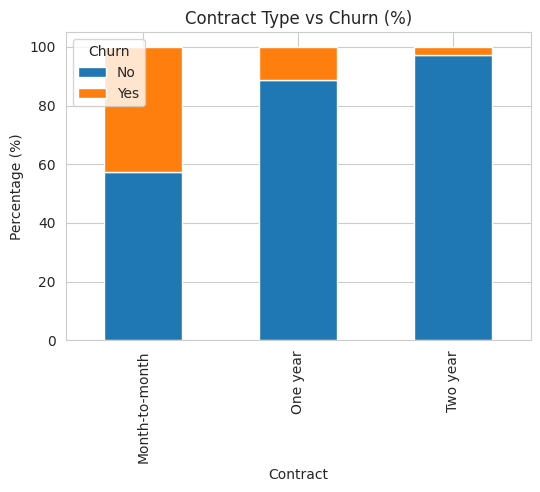

Saved: /content/drive/MyDrive/ML_Coursework_results/payment_vs_churn.png


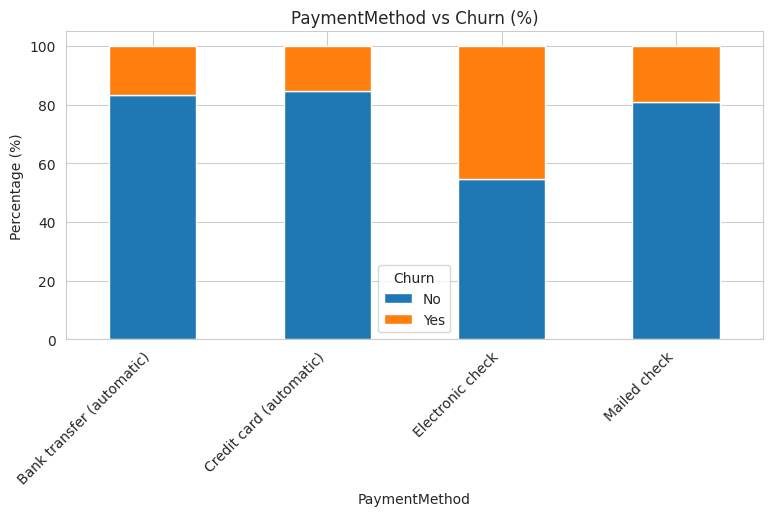

Saved: /content/drive/MyDrive/ML_Coursework_results/corr_heatmap.png


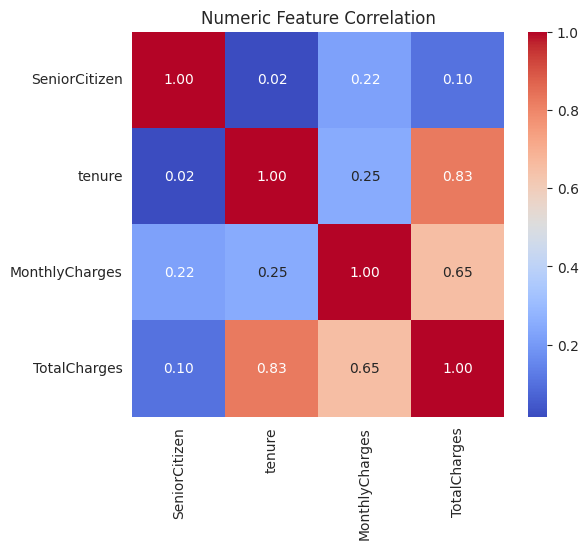

In [ ]:
# === Task 1: Bivariate plots (save PNGs) ===
# Helper to save & show
def save_fig(fig, name):
    path = os.path.join(OUTDIR, name)
    fig.savefig(path, bbox_inches='tight', dpi=150)
    print("Saved:", path)

# 1) Churn count plot
fig, ax = plt.subplots()
sns.countplot(x='Churn', data=df, ax=ax)
ax.set_title('Churn counts')
save_fig(fig, 'churn_counts.png')
plt.show()

# 2) Tenure distribution & boxplot by churn
fig = plt.figure(figsize=(8,3))
sns.histplot(df['tenure'], bins=30)
plt.title('Distribution of Tenure')
save_fig(fig, 'dist_tenure.png')
plt.show()

fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df, ax=ax)
ax.set_title('Tenure by Churn')
save_fig(fig, 'tenure_by_churn.png')
plt.show()

# 3) MonthlyCharges distribution & boxplot by churn
fig = plt.figure(figsize=(8,3))
sns.histplot(df['MonthlyCharges'], bins=30)
plt.title('Distribution of MonthlyCharges')
save_fig(fig, 'dist_monthlycharges.png')
plt.show()

fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=ax)
ax.set_title('MonthlyCharges by Churn')
save_fig(fig, 'monthly_by_churn.png')
plt.show()

# 4) Contract vs churn (stacked percent)
contract_ct = pd.crosstab(df['Contract'], df['Churn'])
contract_pct = contract_ct.div(contract_ct.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(6,4))
contract_pct.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Percentage (%)'); ax.set_title('Contract Type vs Churn (%)')
save_fig(fig, 'contract_vs_churn.png')
plt.show()

# 5) PaymentMethod vs churn
if 'PaymentMethod' in df.columns:
    pm_ct = pd.crosstab(df['PaymentMethod'], df['Churn'])
    pm_pct = pm_ct.div(pm_ct.sum(axis=1), axis=0) * 100
    fig, ax = plt.subplots(figsize=(9,4))
    pm_pct.plot(kind='bar', stacked=True, ax=ax)
    ax.set_ylabel('Percentage (%)'); ax.set_title('PaymentMethod vs Churn (%)')
    plt.xticks(rotation=45, ha='right')
    save_fig(fig, 'payment_vs_churn.png')
    plt.show()

# 6) Correlation heatmap for numeric features
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=ax)
ax.set_title('Numeric Feature Correlation')
save_fig(fig, 'corr_heatmap.png')
plt.show()


In [ ]:
# === Task 1: Churn lift tables for key features ===
overall_churn_rate = (df['Churn']=='Yes').mean()
print("Overall churn rate (fraction):", overall_churn_rate)
features_to_check = ['Contract','InternetService','PaymentMethod','OnlineSecurity','TechSupport','StreamingTV']
for f in features_to_check:
    if f in df.columns:
        rates = df.groupby(f)['Churn'].apply(lambda s: (s=='Yes').mean()).rename('churn_rate').reset_index()
        rates['churn_pct'] = rates['churn_rate']*100
        rates['lift'] = rates['churn_rate'] / overall_churn_rate
        fname = os.path.join(OUTDIR, f'{f}_churn_rates.csv')
        rates.to_csv(fname, index=False)
        print(f"Saved churn lift table: {fname}")
        display(rates.sort_values('lift', ascending=False).head(10))

# === Task 1: Save a small sample of the cleaned data for the report appendix ===
df.head(200).to_csv(os.path.join(OUTDIR, "cleaned_sample_200.csv"), index=False)
print("All outputs saved to", OUTDIR)

Overall churn rate (fraction): 0.2653698707936959
Saved churn lift table: /content/drive/MyDrive/ML_Coursework_results/Contract_churn_rates.csv


,Contract,churn_rate,churn_pct,lift
0,Month-to-month,0.427097,42.709677,1.609440
1,One year,0.112695,11.269518,0.424672
2,Two year,0.028319,2.831858,0.106714


Saved churn lift table: /content/drive/MyDrive/ML_Coursework_results/InternetService_churn_rates.csv


,InternetService,churn_rate,churn_pct,lift
1,Fiber optic,0.418928,41.892765,1.578656
0,DSL,0.189591,18.959108,0.714441
2,No,0.074050,7.404980,0.279044


Saved churn lift table: /content/drive/MyDrive/ML_Coursework_results/PaymentMethod_churn_rates.csv


,PaymentMethod,churn_rate,churn_pct,lift
2,Electronic check,0.452854,45.285412,1.706502
3,Mailed check,0.191067,19.106700,0.720003
0,Bank transfer (automatic),0.167098,16.709845,0.629681
1,Credit card (automatic),0.152431,15.243101,0.574410


Saved churn lift table: /content/drive/MyDrive/ML_Coursework_results/OnlineSecurity_churn_rates.csv


,OnlineSecurity,churn_rate,churn_pct,lift
0,No,0.417667,41.766724,1.573906
2,Yes,0.146112,14.611194,0.550597
1,No internet service,0.074050,7.404980,0.279044


Saved churn lift table: /content/drive/MyDrive/ML_Coursework_results/TechSupport_churn_rates.csv


,TechSupport,churn_rate,churn_pct,lift
0,No,0.416355,41.635474,1.568960
2,Yes,0.151663,15.166341,0.571517
1,No internet service,0.074050,7.404980,0.279044


Saved churn lift table: /content/drive/MyDrive/ML_Coursework_results/StreamingTV_churn_rates.csv


,StreamingTV,churn_rate,churn_pct,lift
0,No,0.335231,33.523132,1.263261
2,Yes,0.300702,30.070188,1.133143
1,No internet service,0.074050,7.404980,0.279044


All outputs saved to /content/drive/MyDrive/ML_Coursework_results


In [ ]:
# ============================================================
# TASK 2 — PREPROCESSING FOR MODELLING
# ============================================================

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Make a copy of cleaned df from Task 1
df_model = df.copy()

# Remove customerID if present
if 'customerID' in df_model.columns:
    df_model = df_model.drop(columns=['customerID'])

# Encode target (Yes = 1, No = 0)
df_model['Churn'] = df_model['Churn'].map({'No': 0, 'Yes': 1})

# Split into X (features) and y (target)
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Identify numeric & categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# ---- Create preprocessing pipeline ----
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

print("Preprocessing pipeline created successfully.")


Numeric features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Preprocessing pipeline created successfully.


In [ ]:
# ============================================================
# TASK 2 — TRAIN / VALIDATION / TEST SPLIT
# ============================================================

from sklearn.model_selection import train_test_split

# Train 70% / Temp 30%
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=42
)

# Validation 15% / Test 15%
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    stratify=y_temp,
    random_state=42
)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

# Fit preprocessor only on the TRAIN data
preprocessor.fit(X_train)

# Transform datasets (used by Neural Network)
X_train_processed = preprocessor.transform(X_train)
X_val_processed   = preprocessor.transform(X_val)
X_test_processed  = preprocessor.transform(X_test)

print("Processed Train shape:", X_train_processed.shape)
print("Processed Val shape:", X_val_processed.shape)
print("Processed Test shape:", X_test_processed.shape)


Train: (4930, 19)
Validation: (1056, 19)
Test: (1057, 19)
Processed Train shape: (4930, 45)
Processed Val shape: (1056, 45)
Processed Test shape: (1057, 45)


In [ ]:
# Task 2 — Decision Tree Classifier (GridSearchCV + Evaluation)


In [ ]:
# === Task 2: Decision Tree training with GridSearchCV ===

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
import joblib
import pandas as pd
import numpy as np
import os

os.makedirs('models', exist_ok=True)
os.makedirs('results', exist_ok=True)

# Build a pipeline: preprocessor (ColumnTransformer) + Decision Tree
tree_pipe = Pipeline([
    ('preproc', preprocessor),   # uses the preprocessor you created earlier
    ('clf', DecisionTreeClassifier(random_state=42))
])

# Parameter grid for GridSearch
param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [3, 5, 8, 12, None],
    'clf__min_samples_leaf': [1, 5, 10, 20],
    'clf__class_weight': [None, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs_tree = GridSearchCV(
    estimator=tree_pipe,
    param_grid=param_grid,
    scoring='roc_auc',   # use ROC AUC for ranking
    cv=cv,
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Fit on TRAIN (X_train, y_train are from your preprocessing cells)
gs_tree.fit(X_train, y_train)

# Save GridSearch results
cv_results_df = pd.DataFrame(gs_tree.cv_results_)
cv_results_df.to_csv('results/tree_gridsearch_results.csv', index=False)
print("GridSearch results saved -> results/tree_gridsearch_results.csv")

# Best estimator and params
best_tree = gs_tree.best_estimator_
print("Best params:", gs_tree.best_params_)
print("Best CV ROC AUC:", gs_tree.best_score_)

# Persist the best pipeline
joblib.dump(best_tree, 'models/tree_pipeline.joblib')
print("Saved best tree pipeline -> models/tree_pipeline.joblib")


Fitting 5 folds for each of 80 candidates, totalling 400 fits
GridSearch results saved -> results/tree_gridsearch_results.csv
Best params: {'clf__class_weight': 'balanced', 'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 20}
Best CV ROC AUC: 0.8240931343690121
Saved best tree pipeline -> models/tree_pipeline.joblib


In [ ]:
cv_df = pd.DataFrame(gs_tree.cv_results_)
top = cv_df.sort_values('mean_test_score', ascending=False).head(10)
top[['params','mean_test_score','std_test_score']].to_csv('results/tree_gridsearch_top10.csv', index=False)
display(top[['params','mean_test_score','std_test_score']].head())


,params,mean_test_score,std_test_score
47,"{'clf__class_weight': 'balanced', 'clf__criter...",0.824093,0.013269
44,"{'clf__class_weight': 'balanced', 'clf__criter...",0.823700,0.012752
45,"{'clf__class_weight': 'balanced', 'clf__criter...",0.823157,0.013417
27,"{'clf__class_weight': None, 'clf__criterion': ...",0.823139,0.014815
46,"{'clf__class_weight': 'balanced', 'clf__criter...",0.822651,0.014635


Classification report (Decision Tree):
              precision    recall  f1-score   support

           0     0.8924    0.6946    0.7812       776
           1     0.4768    0.7687    0.5886       281

    accuracy                         0.7143      1057
   macro avg     0.6846    0.7316    0.6849      1057
weighted avg     0.7819    0.7143    0.7300      1057

Test ROC AUC: 0.8220


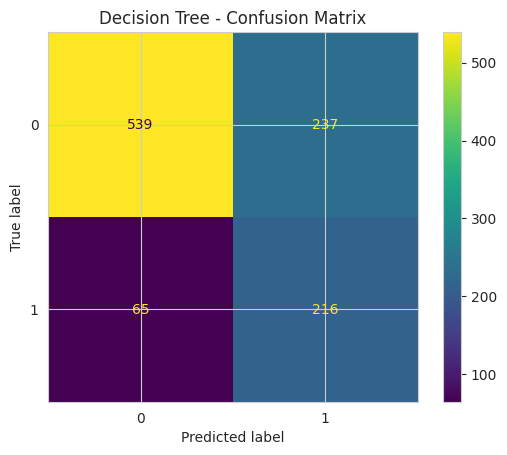

ROC curve saved -> results/tree_roc_curve.png


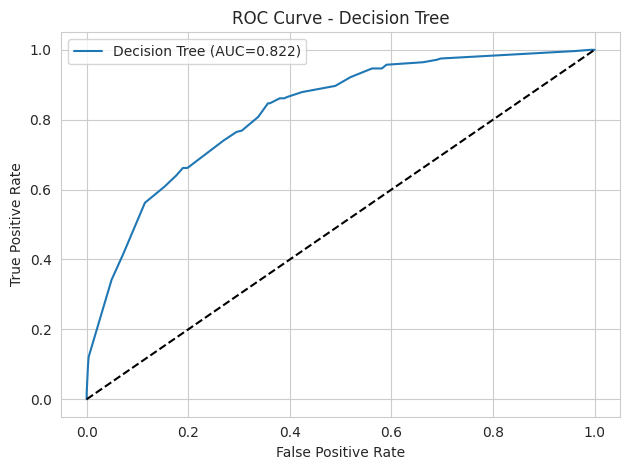

Test predictions saved -> results/tree_test_predictions.csv


In [ ]:
# === Task 2: Evaluation for the best Decision Tree on TEST set ===

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict probabilities and classes on TEST
y_proba_tree = best_tree.predict_proba(X_test)[:, 1]
y_pred_tree = best_tree.predict(X_test)

# Metrics
print("Classification report (Decision Tree):")
print(classification_report(y_test, y_pred_tree, digits=4))

roc_auc = roc_auc_score(y_test, y_proba_tree)
print(f"Test ROC AUC: {roc_auc:.4f}")

# Confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_tree)
plt.figure()
plt.plot(fpr, tpr, label=f"Decision Tree (AUC={roc_auc:.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('results/tree_roc_curve.png', dpi=150)
print("ROC curve saved -> results/tree_roc_curve.png")
plt.show()

# Save test predictions and probabilities for reporting
pd.DataFrame({
    'customer_index': X_test.index,
    'y_true': y_test.values,
    'y_pred': y_pred_tree,
    'y_proba': y_proba_tree
}).to_csv('results/tree_test_predictions.csv', index=False)
print("Test predictions saved -> results/tree_test_predictions.csv")


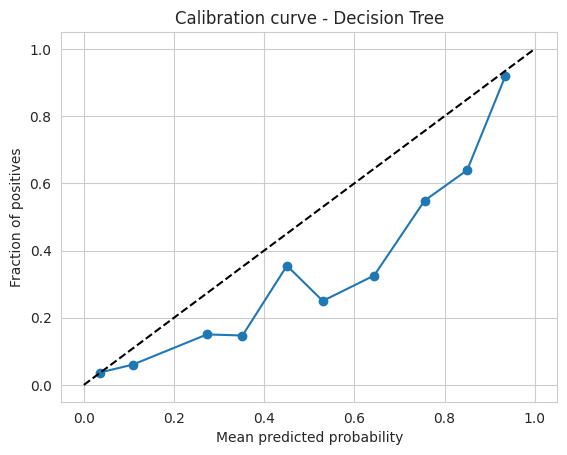

Brier score: 0.16935820927637263


In [ ]:
# == Task 2: Calibration Curve ===
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
y_true = pd.read_csv('results/tree_test_predictions.csv')['y_true']
y_proba = pd.read_csv('results/tree_test_predictions.csv')['y_proba']

prob_true, prob_pred = calibration_curve(y_true, y_proba, n_bins=10)
import matplotlib.pyplot as plt
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curve - Decision Tree')
plt.savefig('results/tree_calibration.png', dpi=150)
plt.show()

print("Brier score:", brier_score_loss(y_true, y_proba))


In [ ]:
# == Task 2:Threshold Sweep ===
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
y_true = pd.read_csv('results/tree_test_predictions.csv')['y_true']
y_proba = pd.read_csv('results/tree_test_predictions.csv')['y_proba']
rows=[]
for thr in np.linspace(0.1,0.9,17):
    y_pred = (y_proba>=thr).astype(int)
    p,r,f,_ = precision_recall_fscore_support(y_true,y_pred,average='binary',zero_division=0)
    rows.append({'threshold':thr,'precision':p,'recall':r,'f1':f})
pd.DataFrame(rows).to_csv('results/tree_threshold_sweep.csv', index=False)
display(pd.DataFrame(rows).sort_values('f1',ascending=False).head())


,threshold,precision,recall,f1
10,0.60,0.558559,0.661922,0.605863
9,0.55,0.558559,0.661922,0.605863
11,0.65,0.589655,0.608541,0.598949
13,0.75,0.639676,0.562278,0.598485
12,0.70,0.639676,0.562278,0.598485


Top feature importances saved -> results/tree_top_feature_importances.csv
Feature importance plot saved -> results/tree_feature_importances.png


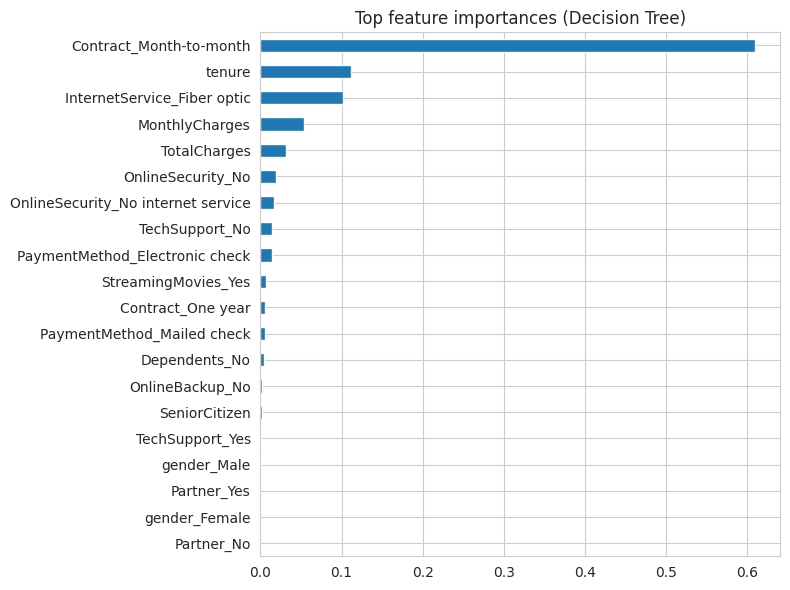

In [ ]:
# === Task 2 : Feature importance mapping ===

import numpy as np
import pandas as pd

# Extract feature names from the preprocessor
# numeric_features is list of numeric column names from preprocessing step
# categorical feature names come from the OneHotEncoder inside the ColumnTransformer
try:
    # Access the fitted preprocessor inside the pipeline (best_tree)
    fitted_preproc = best_tree.named_steps['preproc']
    # numeric feature names
    num_feats = numeric_features  # defined in preprocessing cells
    # categorical one-hot feature names
    cat_transformer = fitted_preproc.named_transformers_['cat']
    # If categorical transformer is a pipeline, get the last step
    if hasattr(cat_transformer, 'named_steps'):
        # Example: Pipeline with onehot
        ohe = cat_transformer.named_steps[list(cat_transformer.named_steps.keys())[-1]]
    else:
        ohe = cat_transformer
    cat_feats = list(ohe.get_feature_names_out(categorical_features))
    feature_names = num_feats + cat_feats
except Exception as e:
    # Fallback: try to get feature names from the preprocessor you created earlier
    try:
        cat_feats = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
        feature_names = numeric_features + cat_feats
    except Exception:
        # last fallback: numeric features only
        feature_names = numeric_features

# Get importances from the classifier step
importances = best_tree.named_steps['clf'].feature_importances_

# Align length safety
if len(importances) != len(feature_names):
    print("Warning: mismatch between importances and feature names lengths.")
    # Trim or pad feature_names to match (best-effort)
    minlen = min(len(importances), len(feature_names))
    importances = importances[:minlen]
    feature_names = feature_names[:minlen]

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.head(30).to_csv('results/tree_top_feature_importances.csv')
print("Top feature importances saved -> results/tree_top_feature_importances.csv")

# Plot top 20
top_n = 20
feat_imp.head(top_n).sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Top feature importances (Decision Tree)")
plt.tight_layout()
plt.savefig('results/tree_feature_importances.png', dpi=150)
print("Feature importance plot saved -> results/tree_feature_importances.png")
plt.show()


Computing permutation importance (this may take a little time)...
Saved permutation importances -> results/permutation_importance.csv


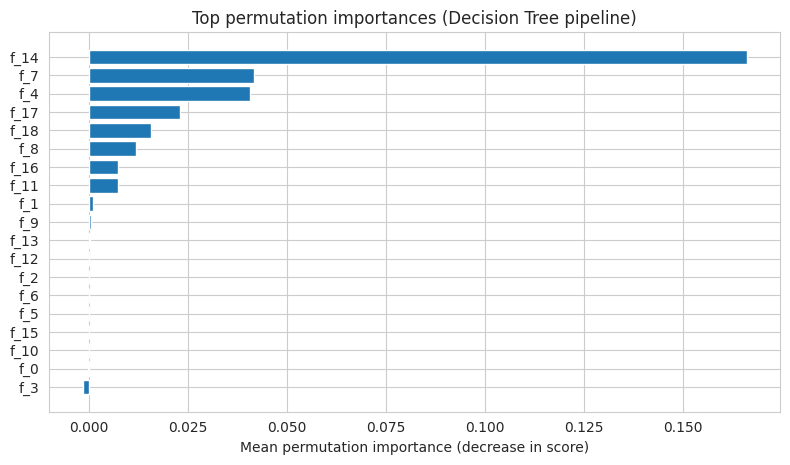

,feature,importance_mean,importance_std
0,f_14,0.166210,0.018666
1,f_7,0.041665,0.004935
2,f_4,0.040815,0.005705
3,f_17,0.023098,0.004854
4,f_18,0.015736,0.002611
5,f_8,0.011990,0.005016
6,f_16,0.007420,0.003307
7,f_11,0.007290,0.003723
8,f_1,0.001196,0.000653
9,f_9,0.000617,0.001027


In [ ]:
# === Task 2 : Permutation importance (robust, handles name/length mismatches) ===
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

os.makedirs('results', exist_ok=True)

# 1) Load pipeline (preprocessor + classifier) - adjust path if different
pipe_path = 'models/tree_pipeline.joblib'
if not os.path.exists(pipe_path):
    raise FileNotFoundError(f"Pipeline not found at {pipe_path}. Run and save the Decision Tree pipeline first.")

pipe = joblib.load(pipe_path)

# 2) Ensure X_test and y_test exist in notebook (raw X_test, not preprocessed arrays)
try:
    X_test  # reference to raise NameError if undefined
    y_test
except NameError:
    raise NameError("X_test or y_test not found in namespace. Re-run preprocessing/split cells before running permutation importance.")

# 3) Compute permutation importance on the whole pipeline (it will call preprocessor internally)
print("Computing permutation importance (this may take a little time)...")
res = permutation_importance(pipe, X_test, y_test, n_repeats=20, random_state=42, n_jobs=-1, scoring='roc_auc')

imp_mean = res.importances_mean  # shape = n_transformed_features
imp_std  = res.importances_std

# 4) Try to get transformed feature names from the fitted preprocessor
feature_names = None
try:
    # If the pipeline has a named 'preproc' step and it supports get_feature_names_out
    preproc = pipe.named_steps.get('preproc', None)
    if preproc is not None:
        try:
            # This will work for modern sklearn ColumnTransformer
            feature_names = list(preproc.get_feature_names_out())
        except Exception:
            # fallback: try with input feature names (X_test columns)
            try:
                feature_names = list(preproc.get_feature_names_out(X_test.columns))
            except Exception:
                feature_names = None
    # Last fallback: attempt to build names from transformers (older sklearn)
    if feature_names is None:
        # try numeric + categorical via named transformers
        try:
            num_feats = pipe.named_steps['preproc'].transformers_[0][2]
            cat_transformer = pipe.named_steps['preproc'].transformers_[1][1]
            cat_cols = pipe.named_steps['preproc'].transformers_[1][2]
            # If categorical transformer is an OneHotEncoder pipeline, locate encoder
            if hasattr(cat_transformer, 'named_steps'):
                enc = cat_transformer.named_steps[list(cat_transformer.named_steps.keys())[-1]]
            else:
                enc = cat_transformer
            cat_names = list(enc.get_feature_names_out(cat_cols))
            feature_names = list(num_feats) + list(cat_names)
        except Exception:
            feature_names = None
except Exception:
    feature_names = None

# 5) If still none, create placeholder names matching the transformed dimension
n_feats = imp_mean.shape[0]
if feature_names is None or len(feature_names) != n_feats:
    print("Warning: could not reliably infer transformed feature names. Creating positional feature names.")
    feature_names = [f"f_{i}" for i in range(n_feats)]

# 6) Build DataFrame and save (align lengths)
imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': imp_mean,
    'importance_std': imp_std
})
# ensure correct length
imp_df = imp_df.iloc[:n_feats].copy()

imp_df = imp_df.sort_values('importance_mean', ascending=False).reset_index(drop=True)
imp_df.to_csv('results/permutation_importance.csv', index=False)
print("Saved permutation importances -> results/permutation_importance.csv")

# 7) Plot top 20 importances
top_n = min(20, len(imp_df))
plt.figure(figsize=(8, max(4, top_n*0.25)))
plt.barh(imp_df['feature'].head(top_n)[::-1], imp_df['importance_mean'].head(top_n)[::-1])
plt.xlabel('Mean permutation importance (decrease in score)')
plt.title('Top permutation importances (Decision Tree pipeline)')
plt.tight_layout()
plt.savefig('results/permutation_importance_top20.png', dpi=150)
plt.show()

# 8) Print a few top features
display(imp_df.head(30))


In [ ]:
# === Task 2 : Fairness / Subgroup Performance Analysis ===
import pandas as pd
from sklearn.metrics import precision_score, recall_score

preds = pd.read_csv('results/tree_test_predictions.csv')

groups = ['Contract','InternetService','PaymentMethod']
rows = []

for g in groups:
    if g in X_test.columns:
        for val in X_test[g].unique():
            mask = (X_test[g] == val)
            if mask.sum() < 30:  # skip tiny groups
                continue
            y_t = y_test[mask]
            y_p = preds.loc[mask.values, 'y_pred'].values
            rows.append({
                'group': g,
                'value': val,
                'n': mask.sum(),
                'precision': precision_score(y_t, y_p, zero_division=0),
                'recall': recall_score(y_t, y_p, zero_division=0),
            })

fair_df = pd.DataFrame(rows)
fair_df.to_csv('results/fairness_by_group.csv', index=False)
display(fair_df)


,group,value,n,precision,recall
0,Contract,Month-to-month,572,0.498801,0.855967
1,Contract,One year,229,0.333333,0.242424
2,Contract,Two year,256,0.000000,0.000000
3,InternetService,DSL,377,0.386364,0.689189
4,InternetService,Fiber optic,441,0.530612,0.852459
5,InternetService,No,239,0.333333,0.375000
6,PaymentMethod,Electronic check,349,0.565737,0.876543
7,PaymentMethod,Mailed check,244,0.322581,0.652174
8,PaymentMethod,Bank transfer (automatic),232,0.437500,0.583333
9,PaymentMethod,Credit card (automatic),232,0.377049,0.621622


In [ ]:
# Task 2 — Neural Network Model (Training, Validation, Evaluation)


In [ ]:

# Task 2 — Neural Network: Model Architecture


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Input dimension from processed training data
input_dim = X_train_processed.shape[1]
print("Input dimension for NN:", input_dim)

def build_nn(input_dim, lr=1e-3, dropout=0.3):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=[keras.metrics.AUC(name='auc')]  # AUC is required for comparison
    )
    return model

nn_model = build_nn(input_dim=input_dim)
nn_model.summary()


Input dimension for NN: 45


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,209 (55.50 KB)

 Trainable params: 14,209 (55.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Task 2 — Neural Network: Training


from sklearn.utils import class_weight
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os

os.makedirs("models", exist_ok=True)

# Compute class weights (important for imbalance)
cw = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {0: cw[0], 1: cw[1]}
print("Class weights:", class_weights)

# Callbacks
early_stop = EarlyStopping(
    monitor='val_auc',
    mode='max',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_auc',
    mode='max',
    factor=0.5,
    patience=5,
    verbose=1
)

checkpoint_path = "models/nn_best_model.h5"
model_ckpt = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_auc',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Train model
history = nn_model.fit(
    X_train_processed,
    y_train,
    validation_data=(X_val_processed, y_val),
    epochs=100,
    batch_size=64,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr, model_ckpt],
    verbose=2
)

print("Training complete. Best model saved to:", checkpoint_path)


Class weights: {0: np.float64(0.680563224737714), 1: np.float64(1.8845565749235473)}
Epoch 1/100

Epoch 1: val_auc improved from -inf to 0.83689, saving model to models/nn_best_model.h5


78/78 - 6s - 78ms/step - auc: 0.7880 - loss: 0.5569 - val_auc: 0.8369 - val_loss: 0.5130 - learning_rate: 1.0000e-03
Epoch 2/100

Epoch 2: val_auc improved from 0.83689 to 0.83945, saving model to models/nn_best_model.h5


78/78 - 2s - 22ms/step - auc: 0.8314 - loss: 0.5052 - val_auc: 0.8395 - val_loss: 0.5336 - learning_rate: 1.0000e-03
Epoch 3/100

Epoch 3: val_auc improved from 0.83945 to 0.84003, saving model to models/nn_best_model.h5


78/78 - 1s - 10ms/step - auc: 0.8324 - loss: 0.5050 - val_auc: 0.8400 - val_loss: 0.5139 - learning_rate: 1.0000e-03
Epoch 4/100

Epoch 4: val_auc improved from 0.84003 to 0.84040, saving model to models/nn_best_model.h5


78/78 - 1s - 9ms/step - auc: 0.8400 - loss: 0.4943 - val_auc: 0.8404 - val_loss: 0.5012 - learning_rate: 1.0000e-03
Epoch 5/100

Epoch 5: val_auc improved from 0.84040 to 0.84174, saving model to models/nn_best_model.h5


78/78 - 2s - 23ms/step - auc: 0.8452 - loss: 0.4868 - val_auc: 0.8417 - val_loss: 0.5026 - learning_rate: 1.0000e-03
Epoch 6/100

Epoch 6: val_auc improved from 0.84174 to 0.84345, saving model to models/nn_best_model.h5


78/78 - 2s - 24ms/step - auc: 0.8425 - loss: 0.4873 - val_auc: 0.8434 - val_loss: 0.4841 - learning_rate: 1.0000e-03
Epoch 7/100

Epoch 7: val_auc did not improve from 0.84345
78/78 - 1s - 8ms/step - auc: 0.8463 - loss: 0.4845 - val_auc: 0.8417 - val_loss: 0.4870 - learning_rate: 1.0000e-03
Epoch 8/100

Epoch 8: val_auc improved from 0.84345 to 0.84373, saving model to models/nn_best_model.h5


78/78 - 0s - 5ms/step - auc: 0.8481 - loss: 0.4817 - val_auc: 0.8437 - val_loss: 0.4998 - learning_rate: 1.0000e-03
Epoch 9/100

Epoch 9: val_auc did not improve from 0.84373
78/78 - 0s - 5ms/step - auc: 0.8472 - loss: 0.4813 - val_auc: 0.8435 - val_loss: 0.5095 - learning_rate: 1.0000e-03
Epoch 10/100

Epoch 10: val_auc did not improve from 0.84373
78/78 - 0s - 4ms/step - auc: 0.8496 - loss: 0.4802 - val_auc: 0.8435 - val_loss: 0.4810 - learning_rate: 1.0000e-03
Epoch 11/100

Epoch 11: val_auc did not improve from 0.84373
78/78 - 0s - 4ms/step - auc: 0.8514 - loss: 0.4765 - val_auc: 0.8432 - val_loss: 0.5527 - learning_rate: 1.0000e-03
Epoch 12/100

Epoch 12: val_auc did not improve from 0.84373
78/78 - 0s - 4ms/step - auc: 0.8541 - loss: 0.4730 - val_auc: 0.8431 - val_loss: 0.5028 - learning_rate: 1.0000e-03
Epoch 13/100

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 13: val_auc did not improve from 0.84373
78/78 - 0s - 4ms/step - auc: 0.8538 - l

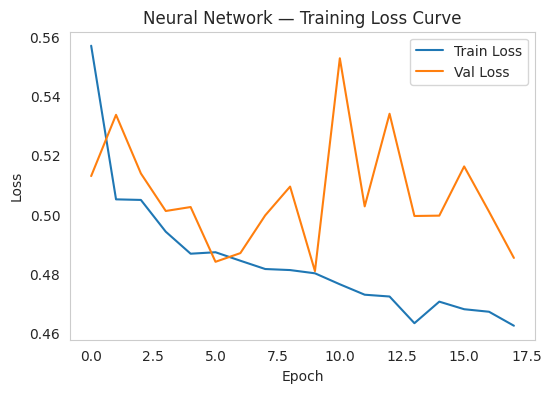

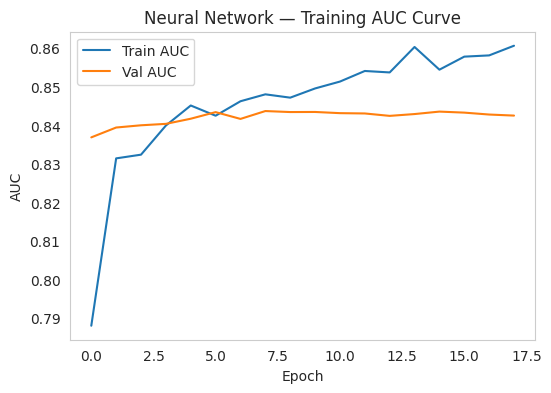

Saved loss and AUC curves in 'results/' folder.


In [ ]:
# Task 2 — Neural Network: Training Curves

import matplotlib.pyplot as plt

# Loss curve
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Neural Network — Training Loss Curve")
plt.legend()
plt.grid()
plt.savefig("results/nn_loss_curve.png", dpi=150)
plt.show()

# AUC curve
plt.figure(figsize=(6,4))
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Val AUC')
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.title("Neural Network — Training AUC Curve")
plt.legend()
plt.grid()
plt.savefig("results/nn_auc_curve.png", dpi=150)
plt.show()

print("Saved loss and AUC curves in 'results/' folder.")


In [ ]:

# Task 2 — Neural Network: Test Set Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    confusion_matrix, classification_report
)
import pandas as pd

# Load best model weights
nn_model.load_weights("models/nn_best_model.h5")

# Predictions
y_proba_nn = nn_model.predict(X_test_processed).ravel()
y_pred_nn = (y_proba_nn >= 0.5).astype(int)

# Compute metrics
nn_metrics = {
    "model": "NeuralNetwork",
    "accuracy": accuracy_score(y_test, y_pred_nn),
    "precision": precision_score(y_test, y_pred_nn, zero_division=0),
    "recall": recall_score(y_test, y_pred_nn, zero_division=0),
    "f1": f1_score(y_test, y_pred_nn, zero_division=0),
    "roc_auc": roc_auc_score(y_test, y_proba_nn),
    "pr_auc": average_precision_score(y_test, y_proba_nn)
}

# Print metrics
print("\nNeural Network — Test Metrics:")
for k, v in nn_metrics.items():
    if k != "model":
        print(f"{k}: {v:.4f}")

# Save metrics
os.makedirs("results", exist_ok=True)
pd.DataFrame([nn_metrics]).to_csv("results/nn_metrics.csv", index=False)
print("Saved metrics -> results/nn_metrics.csv")

# Print classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

# Save predictions
pd.DataFrame({
    "y_true": y_test.values,
    "y_pred": y_pred_nn,
    "y_proba": y_proba_nn
}).to_csv("results/nn_test_predictions.csv", index=False)
print("Saved predictions -> results/nn_test_predictions.csv")


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Neural Network — Test Metrics:
accuracy: 0.7531
precision: 0.5239
recall: 0.7794
f1: 0.6266
roc_auc: 0.8447
pr_auc: 0.6515
Saved metrics -> results/nn_metrics.csv

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.82       776
           1       0.52      0.78      0.63       281

    accuracy                           0.75      1057
   macro avg       0.71      0.76      0.72      1057
weighted avg       0.80      0.75      0.77      1057

Confusion Matrix:
 [[577 199]
 [ 62 219]]
Saved predictions -> results/nn_test_predictions.csv


In [ ]:
# Task 2 : Run this single helper cell to produce results/tree_metrics.csv (if possible)
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, classification_report, confusion_matrix

os.makedirs('results', exist_ok=True)

def save_tree_metrics_from_preds(preds_path='results/tree_test_predictions.csv', out_path='results/tree_metrics.csv'):
    df = pd.read_csv(preds_path)
    y_true = df['y_true'].values
    y_pred = df['y_pred'].values
    y_proba = df['y_proba'].values
    metrics = {
        'model':'DecisionTree',
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, zero_division=0),
        'recall': recall_score(y_true, y_pred, zero_division=0),
        'f1': f1_score(y_true, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_true, y_proba),
        'pr_auc': average_precision_score(y_true, y_proba)
    }
    pd.DataFrame([metrics]).to_csv(out_path, index=False)
    print(f"Saved metrics to {out_path}")
    print("\nClassification report:\n", classification_report(y_true, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))

# 1) If predictions CSV exists, use it (fastest)
preds_file = 'results/tree_test_predictions.csv'
if os.path.exists(preds_file):
    print("Found existing predictions:", preds_file)
    save_tree_metrics_from_preds(preds_file)
else:
    # 2) Try to use a pipeline saved on disk
    model_path = 'models/tree_pipeline.joblib'
    if os.path.exists(model_path):
        print("Found saved pipeline:", model_path)
        try:
            import joblib
            pipe = joblib.load(model_path)
            # Ensure X_test is defined in notebook
            if 'X_test' in globals():
                # pipeline expects raw X_test (not preprocessed arrays)
                y_proba = pipe.predict_proba(X_test)[:,1]
                y_pred = pipe.predict(X_test)
                y_true = y_test.values
                df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred, 'y_proba': y_proba})
                df.to_csv(preds_file, index=False)
                print("Saved predictions ->", preds_file)
                save_tree_metrics_from_preds(preds_file)
            else:
                print("X_test/y_test are not present in this notebook's namespace. Re-run the preprocessing/split cells so X_test and y_test are defined, then re-run this cell.")
        except Exception as e:
            print("Error loading pipeline:", e)
    else:
        # 3) Try to use GridSearch object 'gs_tree' or 'best_tree' in memory
        if 'gs_tree' in globals() or 'best_tree' in globals():
            print("Found GridSearch/best_tree in memory.")
            try:
                est = globals().get('best_tree', None)
                if est is None:
                    est = gs_tree.best_estimator_
                if 'X_test' not in globals():
                    print("X_test/y_test not found in namespace. Re-run preprocessing/split cells and then re-run the Decision Tree evaluation cell (the cell that computes and saves tree_test_predictions.csv).")
                else:
                    y_proba = est.predict_proba(X_test)[:,1]
                    y_pred = est.predict(X_test)
                    y_true = y_test.values
                    pd.DataFrame({'y_true': y_true, 'y_pred': y_pred, 'y_proba': y_proba}).to_csv(preds_file, index=False)
                    print("Saved predictions ->", preds_file)
                    save_tree_metrics_from_preds(preds_file)
            except Exception as e:
                print("Could not compute predictions from in-memory estimator:", e)
        else:
            # 4) Nothing found => instruct user what to run
            print("No tree predictions or model found.")
            print("- If you have not run the Decision Tree evaluation cell, please run the cell that:")
            print("    * computes y_pred_tree and y_proba_tree,")
            print("    * saves results/tree_test_predictions.csv, and")
            print("    * saves results/tree_metrics.csv (or run this helper again after the predictions file exists).")
            print("\nSuggested cells to re-run (in order):")
            print("1) The Decision Tree GridSearch training cell (creates gs_tree / best_tree).")
            print("2) The Decision Tree evaluation cell (that calculates y_pred_tree, y_proba_tree and saves results/tree_test_predictions.csv and results/tree_metrics.csv).")
            print("\nIf you want I can re-run a quick DecisionTree (no GridSearch) to produce metrics now — say 'run quick DT' and I will provide a cell that fits your current preprocessed data.")


Found existing predictions: results/tree_test_predictions.csv
Saved metrics to results/tree_metrics.csv

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.69      0.78       776
           1       0.48      0.77      0.59       281

    accuracy                           0.71      1057
   macro avg       0.68      0.73      0.68      1057
weighted avg       0.78      0.71      0.73      1057

Confusion matrix:
 [[539 237]
 [ 65 216]]


In [ ]:
# ============================================================
# Task 2 — Model Comparison (Decision Tree vs Neural Network)
# This section compares both models using evaluation metrics, ROC curves, and Precision–Recall curves.
# ============================================================

In [ ]:

# Task 2 — Model Comparison: Metrics Table


import pandas as pd
import os

# Load previously saved metrics
tree_metrics_path = "results/tree_metrics.csv"
nn_metrics_path = "results/nn_metrics.csv"

if not (os.path.exists(tree_metrics_path) and os.path.exists(nn_metrics_path)):
    raise FileNotFoundError("Run both Decision Tree and Neural Network evaluation cells first!")

tree_metrics = pd.read_csv(tree_metrics_path)
nn_metrics = pd.read_csv(nn_metrics_path)

# Combine into one table
comparison_df = pd.concat([tree_metrics, nn_metrics], ignore_index=True)

# Save for report
comparison_df.to_csv("results/models_comparison.csv", index=False)

print("Saved combined comparison table -> results/models_comparison.csv")
display(comparison_df)


Saved combined comparison table -> results/models_comparison.csv


,model,accuracy,precision,recall,f1,roc_auc,pr_auc
0,DecisionTree,0.714286,0.476821,0.768683,0.588556,0.822023,0.619152
1,NeuralNetwork,0.753075,0.523923,0.779359,0.626609,0.844678,0.651500


In [ ]:
req = """pandas
numpy
scikit-learn
matplotlib
seaborn
tensorflow
joblib
"""
open("requirements.txt","w").write(req)
print("requirements.txt saved.")


requirements.txt saved.


In [ ]:
readme_text = """# Telco Customer Churn Prediction
This repository contains:
- Task 1 (EDA)
- Task 2 (Decision Tree, Neural Network, Model Comparison)
- Task 3 (AI Ethics & Deployment)
Outputs stored in results/.
"""
open("README.md","w").write(readme_text)
print("README.md saved.")


README.md saved.


In [ ]:
# === Export ALL code cells into appendix_code.txt (for Coursework Appendix) ===

import nbformat
import os
import datetime

# Detect notebook path automatically (Google Colab)
notebooks = []

for root, dirs, files in os.walk('/content'):
    for f in files:
        if f.endswith('.ipynb'):
            notebooks.append(os.path.join(root, f))

if not notebooks:
    raise FileNotFoundError("No .ipynb files found in /content. Upload or save your notebook first.")

nb_path = notebooks[0]  # pick the first notebook found
print("Using notebook:", nb_path)

# Load notebook
nb = nbformat.read(nb_path, as_version=4)

# Extract code cells
code_cells = [c.source for c in nb.cells if c.cell_type == 'code']

# Save to appendix_code.txt
out_path = "/content/appendix_code.txt"

with open(out_path, "w", encoding="utf-8") as f:
    f.write("# Appendix — Source Code Export\n")
    f.write(f"# Extracted from notebook: {nb_path}\n")
    f.write(f"# Export time (UTC): {datetime.datetime.utcnow()}\n\n")

    for i, code in enumerate(code_cells):
        f.write(f"\n\n# ==================== CODE CELL {i} ====================\n")
        f.write(code)
        f.write("\n")

print("Saved appendix_code.txt →", out_path)


Using notebook: /content/drive/MyDrive/Colab Notebooks/2507582_ML_CW.ipynb
Saved appendix_code.txt → /content/appendix_code.txt


/tmp/ipython-input-3016263736.py:33: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f"# Export time (UTC): {datetime.datetime.utcnow()}\n\n")
